<center>
    <h1 id='basic-keras-and-tensorflow' style='color:#7159c1'>🧠 Basic Keras and Tensorflow 🧠</h1>
    <i>Kicking off our journey on Deep Learning</i>
</center>

<h1 id='0-model-with-a-single-layer' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Model with a Single Layer</h1>

In [1]:
# ---- Importations ----
import pandas as pd # pip install pandas
from sklearn.model_selection import train_test_split # pip install sklearn
import tensorflow as tf # pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

In [2]:
# ---- Creating the Model ----
#
# - units: number ofo outputs
# - input_shape: number of inputs
#
model_1 = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

weights_1, bias_1 = model_1.weights

print(model_1.summary())
print('\n---\n')
print(f'- Weights: {weights_1}')
print('\n---\n')
print(f'- Bias: {bias_1}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None

---

- Weights: <tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.03178322],
       [-0.47423685],
       [-0.57325065]], dtype=float32)>

---

- Bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


<h1 id='1-model-with-multiple-layers' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Model with Multiple Layers</h1>

Neural Networks with just `Dense Layers` can only work with Linear Regressor, howerver, if we add Activation Functions like Rectified Linear Unit (ReLU), we can find non-linear patterns, making the network smarter.

> **Predicting Values** - `combination of activation functions with linear one. The last function should always be a linear`;

> **Classification** - `combination of activation functions. The last function should always be an activation one`.

Besideds ReLU, there are others Activation Functions, such as ELU, SELU, SWISH, Sigmoid and so on.

In [3]:
# ---- Creating Model with Multiple Layeers ----
#
# - we can either create a model with the activation function inside the dense layer
# either create the model with the activation function after the dense layer. The result
# will be the same
#
model_2 = keras.Sequential([
    # hidden layers - relu
    layers.Dense(units=4, activation='relu', input_shape=[2])
    , layers.Dense(units=3, activation='relu')
    
    # output layer - linear
    , layers.Dense(units=1, activation='linear')
])

model_2 = keras.Sequential([
    # hidden layers - relu
    layers.Dense(units=4, input_shape=[2])
    , layers.Activation('relu')
    , layers.Dense(units=3)
    , layers.Activation('relu')
    
    # output layer - linear
    , layers.Dense(units=1)
    , layers.Activation('linear')
])

<h1 id='2-improving-performance' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | Improving Performance</h1>

Some ways to improve model's performance:

> **Loss Function** - `calculates how good the model is. Mean Absolute Error (MAE) is often used as a Loss Function`;

> **Optimizers (Stochastic Gradient Descent - SGD)** - `are functions to improve the learning of model in order to get more accurate results and decrease the Loss. ADAM is often applied as a SGD, because this algorithm can improve by itself without the programmer sets the improvement`;

> **(Mini)Batch and Epoch** - `the first one is each time the model trains with the data, whereas the second one is each round the model finishes the traning. Which means, a model can have 5 EPOCHS with 200 BATCHES  each one`.

Besides, as longer the number (size) of batches and epochs, as better  will be the model's learning rate.

Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 10366.7412 - val_loss: 6784.5454
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 5821.6812 - val_loss: 6270.4927
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 5463.0400 - val_loss: 6662.2520
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 5329.9971 - val_loss: 6140.7881
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 4745.9194 - val_loss: 5312.0908
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 4434.1406 - val_loss: 5431.9590
Epoch 7/10
6/6 [==============================] - 0s 14ms/step - loss: 4330.8730 - val_loss: 5293.7534
Epoch 8/10
6/6 [==============================] - 0s 13ms/step - loss: 3999.8269 - val_loss: 4613.9155
Epoch 9/10
6/6 [==============================] - 0s 13ms/step - loss: 3620.0576 - val_loss: 4710.7168
Epoch 10/10
6/6 [==============================] - 0s 12ms/step - loss: 

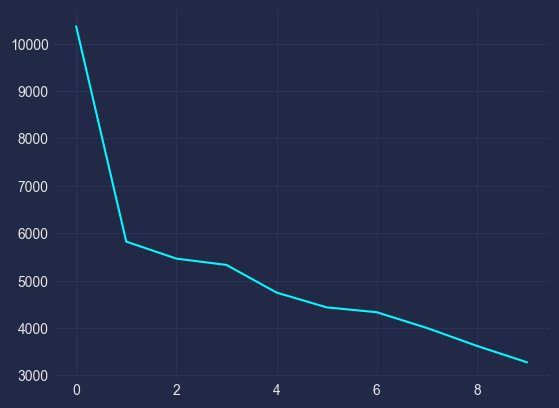

In [6]:
# ---- Creating the Model ----
model_3 = keras.Sequential([
    # hidden layers - relu
    layers.Dense(units=512, activation='relu', input_shape=[16])
    , layers.Dense(units=512, activation='relu')
    , layers.Dense(units=512, activation='relu')
    
    # output layer - linear
    , layers.Dense(units=1, activation='linear')
])

# ---- Defining the Loss and the Optimizer Functions ----
model_3.compile(
    optimizer='adam'
    # optimizer='sgd' # SGD is more sensitive to differences of scale
    , loss='mae'
)

# ---- Training the Model ----
#
# The model will receive 25 rows at a time (batch size)
# till proccess all of the dataset.
# And this step will be repeated 10 times (epochs)
#
history = model_3.fit(
    X_train, y_train
    , validation_data=(X_valid, y_valid)
    , batch_size=25
    , epochs=10
)

# ---- Plotting the Loss Function ----
history_df = pd.DataFrame(history.history)
history_df.loss.plot()
plt.show()

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).